In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from itertools import combinations

In [6]:
df_raw = os.path.join('mtcars.csv')
df = pd.read_csv(df_raw)


In [41]:
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [10]:
df.mean()

C:\Users\gl121\AppData\Local\Temp\ipykernel_6344\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [11]:
df.var()

C:\Users\gl121\AppData\Local\Temp\ipykernel_6344\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [12]:
df.cov()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,36.324103,-9.172379,-633.097208,-320.732056,2.195064,-5.116685,4.509149,2.017137,1.803931,2.135685,-5.363105
cyl,-9.172379,3.189516,199.660282,101.931452,-0.668367,1.367371,-1.886855,-0.729839,-0.465726,-0.649194,1.520161
disp,-633.097208,199.660282,15360.799829,6721.158669,-47.064019,107.684204,-96.051681,-44.377621,-36.564012,-50.802621,79.068750
hp,-320.732056,101.931452,6721.158669,4700.866935,-16.451109,44.192661,-86.770081,-24.987903,-8.320565,-6.358871,83.036290
drat,2.195064,-0.668367,-47.064019,-16.451109,0.285881,-0.372721,0.087141,0.118649,0.190151,0.275988,-0.078407
wt,-5.116685,1.367371,107.684204,44.192661,-0.372721,0.957379,-0.305482,-0.273661,-0.338105,-0.421081,0.675790
qsec,4.509149,-1.886855,-96.051681,-86.770081,0.087141,-0.305482,3.193166,0.670565,-0.204960,-0.280403,-1.894113
vs,2.017137,-0.729839,-44.377621,-24.987903,0.118649,-0.273661,0.670565,0.254032,0.042339,0.076613,-0.463710
am,1.803931,-0.465726,-36.564012,-8.320565,0.190151,-0.338105,-0.204960,0.042339,0.248992,0.292339,0.046371
gear,2.135685,-0.649194,-50.802621,-6.358871,0.275988,-0.421081,-0.280403,0.076613,0.292339,0.544355,0.326613


In [13]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


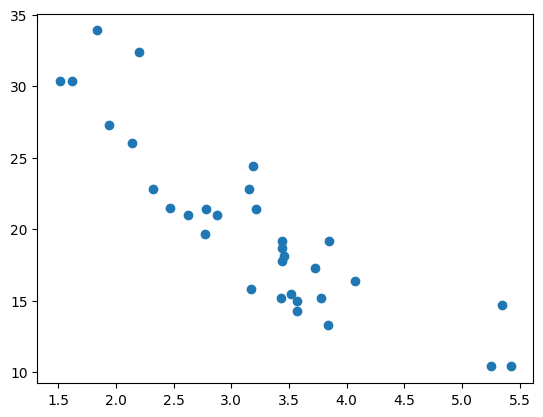

In [15]:
plt.scatter(x=df['wt'],y=df['mpg'])

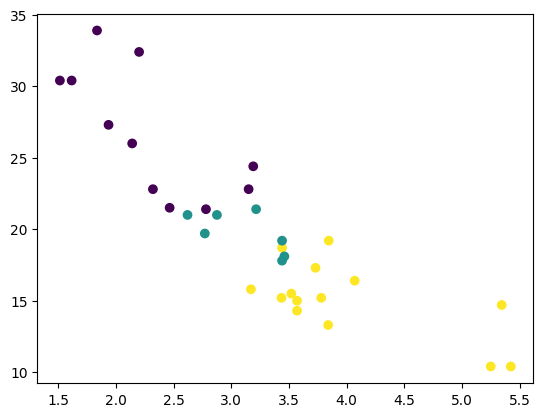

In [40]:
plt.scatter(x=df['wt'],y=df['mpg'],c=df['cyl'])

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cyl', ylabel='mpg'>,
        <AxesSubplot:xlabel='disp', ylabel='mpg'>,
        <AxesSubplot:xlabel='hp', ylabel='mpg'>,
        <AxesSubplot:xlabel='drat', ylabel='mpg'>,
        <AxesSubplot:xlabel='wt', ylabel='mpg'>,
        <AxesSubplot:xlabel='qsec', ylabel='mpg'>,
        <AxesSubplot:xlabel='vs', ylabel='mpg'>,
        <AxesSubplot:xlabel='am', ylabel='mpg'>,
        <AxesSubplot:xlabel='gear', ylabel='mpg'>,
        <AxesSubplot:xlabel='carb', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cyl'>,
        <AxesSubplot:xlabel='cyl', ylabel='cyl'>,
        <AxesSubplot:xlabel='disp', ylabel='cyl'>,
        <AxesSubplot:xlabel='hp', ylabel='cyl'>,
        <AxesSubplot:xlabel='drat', ylabel='cyl'>,
        <AxesSubplot:xlabel='wt', ylabel='cyl'>,
        <AxesSubplot:xlabel='qsec', ylabel='cyl'>,
        <AxesSubplot:xlabel='vs', ylabel='cyl'>,
        <AxesSubplot:xlabel='am', ylabel='cyl'>,

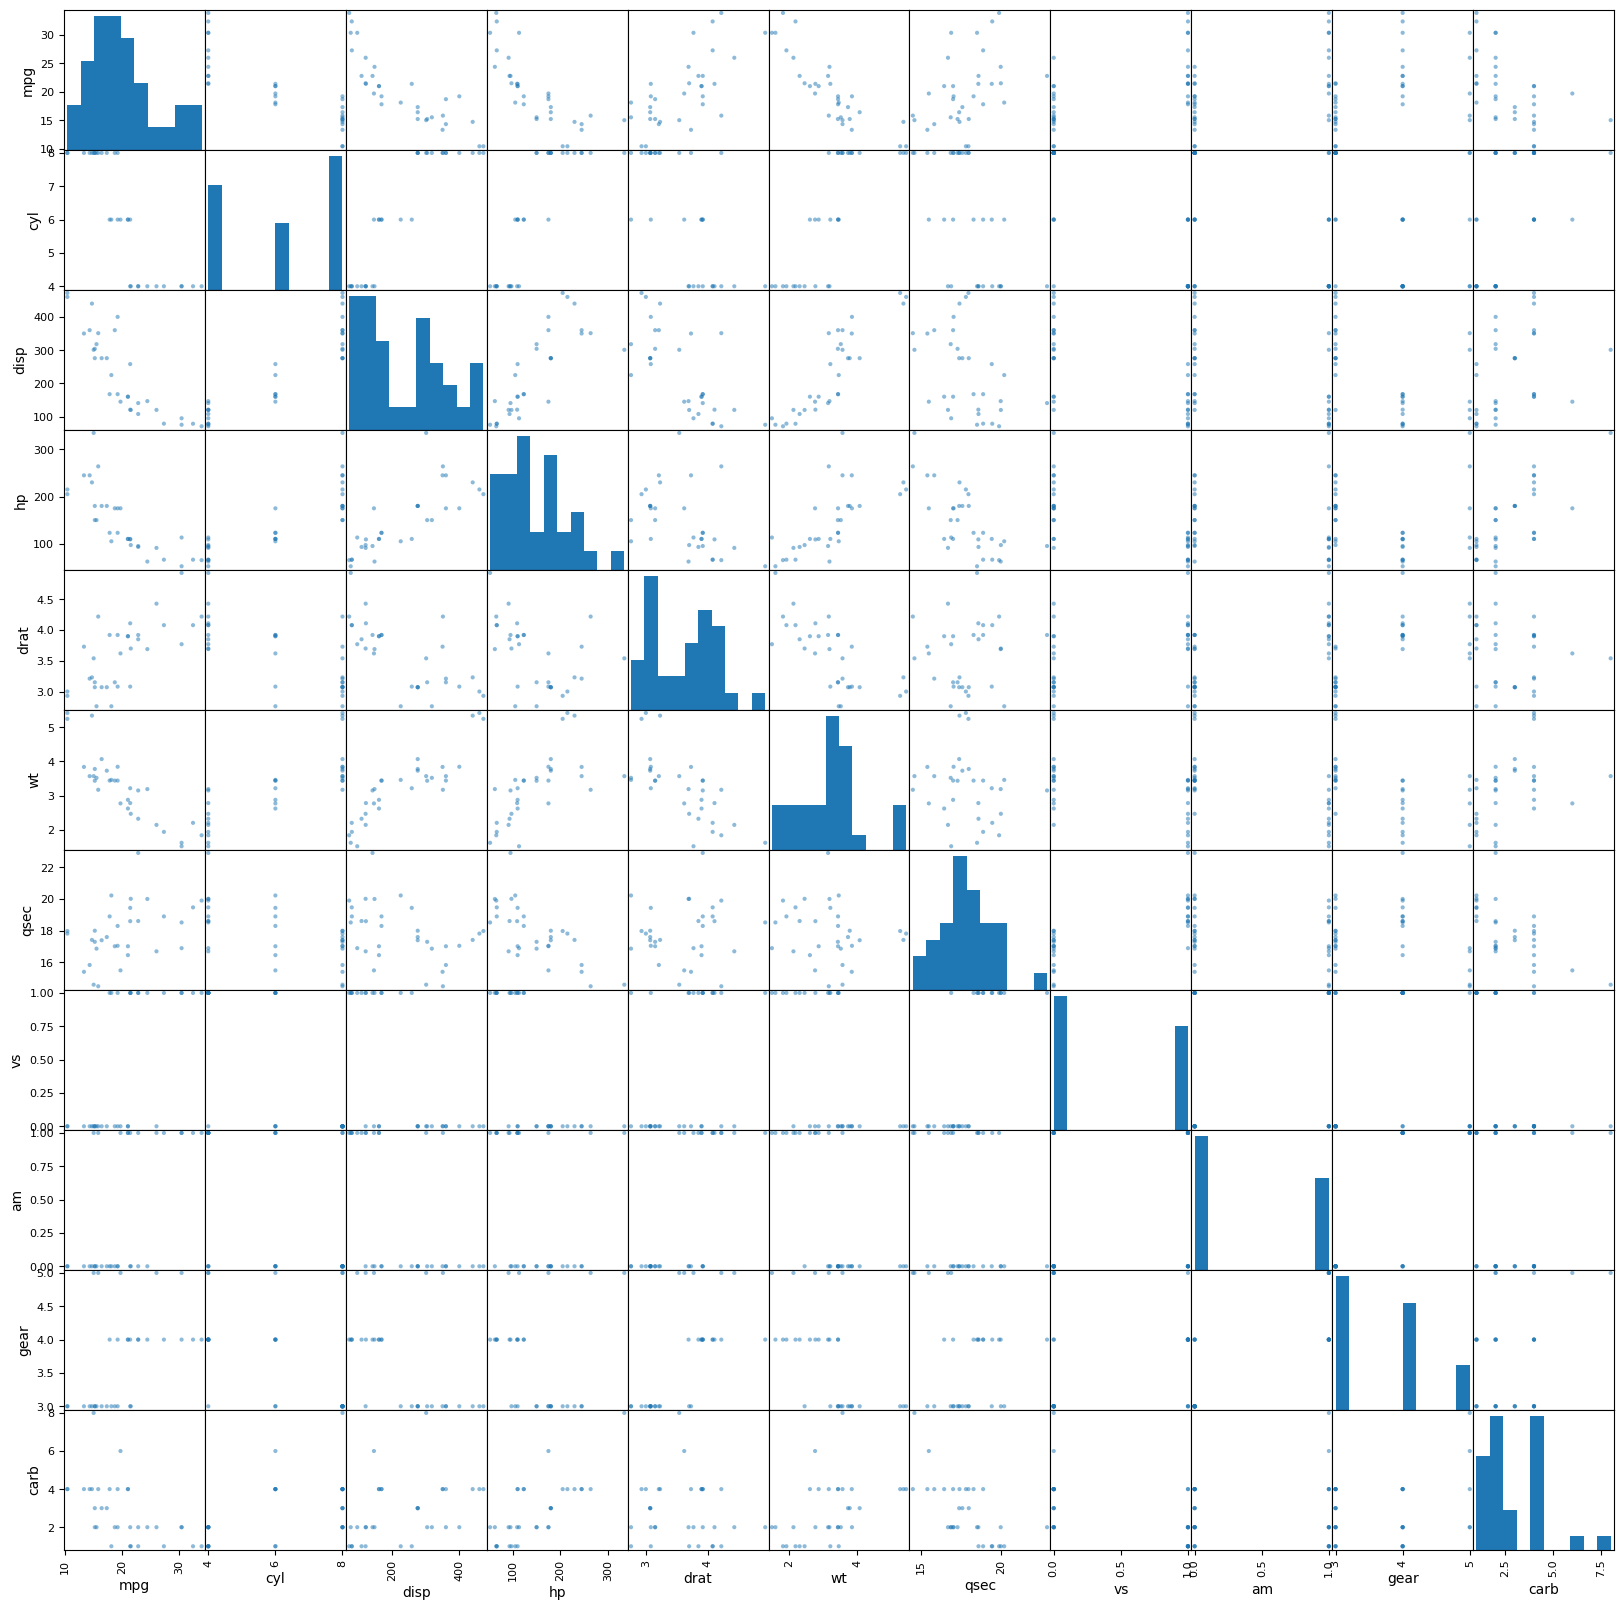

In [39]:
pd.plotting.scatter_matrix(df,figsize=(20,20))